In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import miceforest as mf
pd.set_option('display.max_columns', None)
import re

In [2]:
test = pd.read_csv("/home/for_conda/Desktop/a_task3.csv",sep=';', decimal='.', thousands=r',',low_memory=False)
df = pd.DataFrame(data=test)
df = df.rename(columns = lambda x:re.sub('[^A-Za-zА-Яa-я0-9_]+', '', x))
df['Статусзаказа']

0            Доставлено
1            Доставлено
2            Доставлено
3         Не доставлено
4            Доставлено
              ...      
199574       Доставлено
199575       Доставлено
199576       Доставлено
199577       Доставлено
199578       Доставлено
Name: Статусзаказа, Length: 199579, dtype: object

In [3]:
#df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))  # пример краткого перевода типов, но, он работает не всегда, из объектов в категории иногда не переводит
df = df.select_dtypes(exclude=['datetime64[ns]'])
df = df.drop(['ЛокусныеНелокусные','Заказупаковкиостаток'],axis='columns') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199579 entries, 0 to 199578
Data columns (total 48 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Дата                                199579 non-null  object 
 1   Месяц                               199579 non-null  object 
 2   Год                                 199579 non-null  int64  
 3   Время                               199560 non-null  object 
 4   Категориясотрудника                 199579 non-null  object 
 5   Городсотрудника                     199579 non-null  object 
 6   Медпредставитель                    199579 non-null  object 
 7   Региональныйменеджер                197924 non-null  object 
 8   Город                               199579 non-null  object 
 9   Типаптеки                           199579 non-null  object 
 10  Названиеаптеки                      199579 non-null  object 
 11  Юрлицо                    

In [4]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns with missing NaN values
categorical_columns_with_missing = [col for col in df.columns if df[col].dtype == 'object' and df[col].isnull().any()]

# Create dictionaries to store LabelEncoders and encoding mappings for each column
label_encoders = {}
encoding_mappings = {}

# Apply label encoding to each categorical column and store the encoders and mappings
for column in categorical_columns_with_missing:
        non_nan_indices = df[column].notna()
        label_encoders[column] = LabelEncoder()
        df.loc[non_nan_indices, column + '_encoded'] = label_encoders[column].fit_transform(df.loc[non_nan_indices, column])
        encoding_mappings[column] = dict(zip(df[column], df[column + '_encoded']))
        
        
for column in df.columns:
    # Check if the column has missing values and is of object dtype (categorical)
    if df[column].isna().any() and df[column].dtype == 'object':
        df = df.drop([column],axis='columns') 
        

df.info() 

/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199579 entries, 0 to 199578
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Дата                                        199579 non-null  object 
 1   Месяц                                       199579 non-null  object 
 2   Год                                         199579 non-null  int64  
 3   Категориясотрудника                         199579 non-null  object 
 4   Городсотрудника                             199579 non-null  object 
 5   Медпредставитель                            199579 non-null  object 
 6   Город                                       199579 non-null  object 
 7   Типаптеки                                   199579 non-null  object 
 8   Названиеаптеки                              199579 non-null  object 
 9   IDаптеки                                    199579 non-null  int64  
 

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')
        
# Create kernel. 
kernel = mf.ImputationKernel(
  df,
  datasets=2,
  save_all_iterations=True,
  random_state=1991
)
# Run the MICE algorithm for 4 iterations0
kernel.mice(iterations=3,boosting='gbdt', min_sum_hessian_in_leaf=0.015, n_estimators=50) #0.01
completed_dataset = kernel.complete_data(dataset=0, inplace=False)

/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/miceforest/ImputationKernel.py:369: UserWarning: [Дата,Медпредставитель,Названиеаптеки,Городаптеки,Адресаптеки] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to preventlightgbm from outputting 0.0 probabilities.
  warn(


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Met categoric

In [6]:
completed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199579 entries, 0 to 199578
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   Дата                                        199579 non-null  category
 1   Месяц                                       199579 non-null  category
 2   Год                                         199579 non-null  int64   
 3   Категориясотрудника                         199579 non-null  category
 4   Городсотрудника                             199579 non-null  category
 5   Медпредставитель                            199579 non-null  category
 6   Город                                       199579 non-null  category
 7   Типаптеки                                   199579 non-null  category
 8   Названиеаптеки                              199579 non-null  category
 9   IDаптеки                                    199579 non-null

In [7]:
#Decoding of encoded values back to theor corresponding keys
for column in categorical_columns_with_missing:
    completed_dataset[column] = completed_dataset[column + '_encoded'].map({v: k for k, v in encoding_mappings[column].items()})

In [8]:
completed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199579 entries, 0 to 199578
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   Дата                                        199579 non-null  category
 1   Месяц                                       199579 non-null  category
 2   Год                                         199579 non-null  int64   
 3   Категориясотрудника                         199579 non-null  category
 4   Городсотрудника                             199579 non-null  category
 5   Медпредставитель                            199579 non-null  category
 6   Город                                       199579 non-null  category
 7   Типаптеки                                   199579 non-null  category
 8   Названиеаптеки                              199579 non-null  category
 9   IDаптеки                                    199579 non-null

In [9]:
for column in categorical_columns_with_missing:
    completed_dataset = completed_dataset.drop([column+ '_encoded'],axis='columns') 
    
completed_dataset.head(20)

,Дата,Месяц,Год,Категориясотрудника,Городсотрудника,Медпредставитель,Город,Типаптеки,Названиеаптеки,IDаптеки,Городаптеки,Адресаптеки,БИНаптеки,Бизнесподразделение,Остатокупаковки,ЦенаKZT,Заказупаковкизаказ,ЗаказбезскидкиKZT,Размерскидки,ЗаказсучетомскидкиKZT,НомерзаказаPharmcenter,Доставленноеколво,Доставленнаяскидка,Доставленнаяцена,Время,Региональныйменеджер,Юрлицо,Категорияаптеки,Входваптекудатаивремя,Входваптекуширотаидолгота,Снятиеостатков1датаивремя,СнятиеостатковNдатаивремя,Снятиеостатков1широтаидолгота,СнятиеостатковNширотаидолгота,Длительностьснятияостатков,Подтверждениезаказа1датаивремя,ПодтверждениезаказаNдатаивремя,Подтверждениезаказа1широтаидолгота,ПодтверждениезаказаNширотаидолгота,Длительностьподтверждениязаказа,Общаядлительностьвизита,Дистрибьютор,Брэнд,Полноеторговоенаименование,НомерзаказаДистрибьютора,Статусзаказа,Номернакладной,Номерсчетфактуры
0,01/02/21,Январь,2021,Медицинский представитель (МП),Семей,МП 1,Семей,Индивидуальные,ТОО Социальная аптека,9941,Семей,"г. Семей, ул. Ауэзова, д. 39",180340026673,1 группа,1.0,1690.00,1.0,1690.00,0.0,1690.0000,317916.0,1.0,0.0,16900000.0,06:16:46 PM,РМ 1,ТОО JNK-ФАРМ (ДЖИЭНКА-ФАРМ),С,06:16:00 PM,50.4489514 80.2759039,05:34:00 PM,05:34:00 PM,"51,13805840578792 71,40339634316685","50,3819341 80,2391293",06:40:00 PM,06:01:00 PM,06:33:00 PM,"50,4490455 80,2757986","50,4525413 80,2172734",09:09:00 AM,05:01:00 AM,Аманат (Семей),Брэнд 1,SKU 1,M-000690407,Доставлено,G-000000040,60000015997
1,01/04/21,Январь,2021,Медицинский представитель (МП),Павлодар,МП 2,Павлодар,Индивидуальные,ТОО Фирма Лаура,9353,Павлодар,ул. Лермонтова 90,940940001203,OTC,10.0,1563.00,10.0,15630.00,15.0,13285.5000,317924.0,10.0,175000.0,15630000.0,10:21:37 AM,РМ 2,ИП Ульянова Д.М.,В,10:20:00 AM,52.26743984413218 76.9637725097164,10:20:00 AM,10:20:00 AM,"52,29961403849446 76,97167817455968","52,29961403849446 76,97167817455968",06:40:00 PM,10:21:00 AM,10:21:00 AM,"52,26740960546815 76,96374497230134","52,26740960546815 76,96374497230134",02:25:00 AM,07:58:00 AM,Аманат (Павлодар),Брэнд 2,SKU 2,M-000691866,Доставлено,S-000000099,60000015275
2,01/04/21,Январь,2021,Медицинский представитель (МП),Семей,МП 3,Семей,Индивидуальные,ТОО Социальная аптека,9941,Семей,"г. Семей, ул. Ауэзова, д. 39",180340026673,OTC,5.0,1552.90,5.0,7764.50,15.0,6599.8250,317943.0,5.0,150000.0,15529360.0,11:14:57 AM,РМ 2,ТОО АК-КАЙЫН,С,11:14:00 AM,50.3988764 80.2052792,10:49:00 AM,10:59:00 AM,"50,040962505277186 72,96582520734499","50,3819341 80,2391293",06:40:00 PM,10:58:00 AM,11:10:00 AM,"50,27252759778913 57,13745911213745","50,0610846920281 72,99535786303461",08:18:00 AM,10:13:00 AM,Медсервис (Семей),Брэнд 2,SKU 2,204502409,Доставлено,800630159,60000015997
3,01/04/21,Январь,2021,Медицинский представитель (МП),Шымкент,МП 4,Шымкент,Индивидуальные,ТОО Оркен,13684,Шымкент,"г.Кентау, ул. Яссауи,97",31040007916,OTC,8.0,4218.49,10.0,42184.90,15.0,35857.1650,317948.0,10.0,150000.0,43150000.0,11:22:03 AM,РМ 3,ТОО АСТАНА БАРАКАТ ФАРМ,С,11:20:00 AM,43.2364524118266 76.30161529880102,10:59:00 AM,10:59:00 AM,"42,8913739 71,3479227","43,20172832269712 76,62132014276048",02:57:00 AM,11:12:00 AM,12:12:00 PM,"43,429782026855015 77,0254894316012","44,99953829792327 78,36125369787457",09:09:00 AM,10:55:00 AM,Инкар Шымкент,Брэнд 3,SKU 3,201296274,Не доставлено,70078834,УТ-20005212
4,01/04/21,Январь,2021,Медицинский представитель (МП),Шымкент,МП 4,Шымкент,Индивидуальные,ТОО Оркен,13684,Шымкент,"г.Кентау, ул. Яссауи,97",31040007916,OTC,35.0,980.00,50.0,49000.00,15.0,41650.0000,317947.0,50.0,175000.0,9800000.0,11:22:18 AM,РМ 3,ТОО БАТЫС МЖК ГРУПП,В,11:20:00 AM,43.250152 76.877681,10:59:00 AM,10:59:00 AM,"42,8913739 71,3479227","43,20172832269712 76,62132014276048",02:32:00 PM,11:16:00 AM,11:16:00 AM,"43,24941834376874 76,8904813154466","43,24390866495227 76,83801697054928",08:18:00 AM,10:13:00 AM,Аманат (Шымкент),Брэнд 4,SKU 4,M-000692086,Доставлено,X-000000151,УТ-20005439
5,01/04/21,Январь,2021,Медицинский представитель (МП),Шымкент,МП 4,Шымкент,Индивид

In [10]:
#completed_dataset['Длительностьподтверждениязаказа'] = completed_dataset['Длительностьподтверждениязаказа'].str.replace(':000', '').str.strip()  # Remove ":000" and extra spaces
#completed_dataset['Длительностьподтверждениязаказа'] = pd.to_datetime(completed_dataset['Длительностьподтверждениязаказа'], format='%I:%M:%S %p', errors='coerce')
def normalize_time(time_str):
    # Define a regular expression pattern to match various time formats
    pattern = r'(\d{1,2}:\d{2}:\d{2}(?:\s[APap][Mm])?)'
    match = re.search(pattern, time_str)
    if match:
        return match.group(1)
    else:
        return None

completed_dataset['Общаядлительностьвизита'] = completed_dataset['Общаядлительностьвизита'].apply(normalize_time)
completed_dataset['Длительностьподтверждениязаказа'] = completed_dataset['Длительностьподтверждениязаказа'].apply(normalize_time)
completed_dataset['Общаядлительностьвизита'] = pd.to_datetime(completed_dataset['Общаядлительностьвизита'], format='%I:%M:%S %p', errors='coerce')
completed_dataset['Длительностьподтверждениязаказа'] = pd.to_datetime(completed_dataset['Длительностьподтверждениязаказа'], format='%I:%M:%S %p', errors='coerce')

completed_dataset['Дата'] = pd.to_datetime(completed_dataset['Дата'],format='%m/%d/%y')
completed_dataset['Время'] = pd.to_datetime(completed_dataset['Время'],format='%I:%M:%S %p')
completed_dataset['Входваптекудатаивремя'] = pd.to_datetime(completed_dataset['Входваптекудатаивремя'],format='%I:%M:%S %p')
completed_dataset['Подтверждениезаказа1датаивремя'] = pd.to_datetime(completed_dataset['Подтверждениезаказа1датаивремя'],format='%I:%M:%S %p')
completed_dataset['ПодтверждениезаказаNдатаивремя'] = pd.to_datetime(completed_dataset['ПодтверждениезаказаNдатаивремя'],format='%I:%M:%S %p')

completed_dataset

,Дата,Месяц,Год,Категориясотрудника,Городсотрудника,Медпредставитель,Город,Типаптеки,Названиеаптеки,IDаптеки,Городаптеки,Адресаптеки,БИНаптеки,Бизнесподразделение,Остатокупаковки,ЦенаKZT,Заказупаковкизаказ,ЗаказбезскидкиKZT,Размерскидки,ЗаказсучетомскидкиKZT,НомерзаказаPharmcenter,Доставленноеколво,Доставленнаяскидка,Доставленнаяцена,Время,Региональныйменеджер,Юрлицо,Категорияаптеки,Входваптекудатаивремя,Входваптекуширотаидолгота,Снятиеостатков1датаивремя,СнятиеостатковNдатаивремя,Снятиеостатков1широтаидолгота,СнятиеостатковNширотаидолгота,Длительностьснятияостатков,Подтверждениезаказа1датаивремя,ПодтверждениезаказаNдатаивремя,Подтверждениезаказа1широтаидолгота,ПодтверждениезаказаNширотаидолгота,Длительностьподтверждениязаказа,Общаядлительностьвизита,Дистрибьютор,Брэнд,Полноеторговоенаименование,НомерзаказаДистрибьютора,Статусзаказа,Номернакладной,Номерсчетфактуры
0,2021-01-02,Январь,2021,Медицинский представитель (МП),Семей,МП 1,Семей,Индивидуальные,ТОО Социальная аптека,9941,Семей,"г. Семей, ул. Ауэзова, д. 39",180340026673,1 группа,1.0,1690.00,1.0,1690.0,0.0,1690.000,317916.0,1.0,0.0,16900000.0,1900-01-01 18:16:46,РМ 1,ТОО JNK-ФАРМ (ДЖИЭНКА-ФАРМ),С,1900-01-01 18:16:00,50.4489514 80.2759039,05:34:00 PM,05:34:00 PM,"51,13805840578792 71,40339634316685","50,3819341 80,2391293",06:40:00 PM,1900-01-01 18:01:00,1900-01-01 18:33:00,"50,4490455 80,2757986","50,4525413 80,2172734",1900-01-01 09:09:00,1900-01-01 05:01:00,Аманат (Семей),Брэнд 1,SKU 1,M-000690407,Доставлено,G-000000040,60000015997
1,2021-01-04,Январь,2021,Медицинский представитель (МП),Павлодар,МП 2,Павлодар,Индивидуальные,ТОО Фирма Лаура,9353,Павлодар,ул. Лермонтова 90,940940001203,OTC,10.0,1563.00,10.0,15630.0,15.0,13285.500,317924.0,10.0,175000.0,15630000.0,1900-01-01 10:21:37,РМ 2,ИП Ульянова Д.М.,В,1900-01-01 10:20:00,52.26743984413218 76.9637725097164,10:20:00 AM,10:20:00 AM,"52,29961403849446 76,97167817455968","52,29961403849446 76,97167817455968",06:40:00 PM,1900-01-01 10:21:00,1900-01-01 10:21:00,"52,26740960546815 76,96374497230134","52,26740960546815 76,96374497230134",1900-01-01 02:25:00,1900-01-01 07:58:00,Аманат (Павлодар),Брэнд 2,SKU 2,M-000691866,Доставлено,S-000000099,60000015275
2,2021-01-04,Январь,2021,Медицинский представитель (МП),Семей,МП 3,Семей,Индивидуальные,ТОО Социальная аптека,9941,Семей,"г. Семей, ул. Ауэзова, д. 39",180340026673,OTC,5.0,1552.90,5.0,7764.5,15.0,6599.825,317943.0,5.0,150000.0,15529360.0,1900-01-01 11:14:57,РМ 2,ТОО АК-КАЙЫН,С,1900-01-01 11:14:00,50.3988764 80.2052792,10:49:00 AM,10:59:00 AM,"50,040962505277186 72,96582520734499","50,3819341 80,2391293",06:40:00 PM,1900-01-01 10:58:00,1900-01-01 11:10:00,"50,27252759778913 57,13745911213745","50,0610846920281 72,99535786303461",1900-01-01 08:18:00,1900-01-01 10:13:00,Медсервис (Семей),Брэнд 2,SKU 2,204502409,Доставлено,800630159,60000015997
3,2021-01-04,Январь,2021,Медицинский представитель (МП),Шымкент,МП 4,Шымкент,Индивидуальные,ТОО Оркен,13684,Шымкент,"г.Кентау, ул. Яссауи,97",31040007916,OTC,8.0,4218.49,10.0,42184.9,15.0,35857.165,317948.0,10.0,150000.0,43150000.0,1900-01-01 11:22:03,РМ 3,ТОО АСТАНА БАРАКАТ ФАРМ,С,1900-01-01 11:20:00,43.2364524118266 76.30161529880102,10:59:00 AM,10:59:00 AM,"42,8913739 71,3479227","43,20172832269712 76,62132014276048",02:57:00 AM,1900-01-01 11:12:00,1900-01-01 12:12:00,"43,429782026855015 77,0254894316012","44,99953829792327 78,36125369787457",1900-01-01 09:09:00,1900-01-01 10:55:00,Инкар Шымкент,Брэнд 3,SKU 3,201296274,Не доставлено,70078834,УТ-20005212
4,2021-01-04,Январь,2021,Медицинский представитель (МП),Шымкент,МП 4,Шымкент,Индивидуальные,ТОО Оркен,13684,Шымкент,"г.Кентау, ул. Яссауи,97",31040007916,OTC,35.0,980.00,50.0,49000.0,15.0,41650.000,317947.0,50.0,175000.0,9800000.0,1900-01-01 11:22:18,РМ 3,ТОО БАТЫС МЖК ГРУПП,В,1900-01-01 11:20:00,43.250152 76.877681,10:59:00 AM,10:59:00 AM,"42,8913739 71,3479227","43,20172832269712 76,62132014276048",02:32:00 PM,1900-01-01 11:16:00,1900-01-01 11:16:00,"43,24941834376874 76,8904813154466

/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/for_conda/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

ValueError: could not convert string to float: 'Январь'

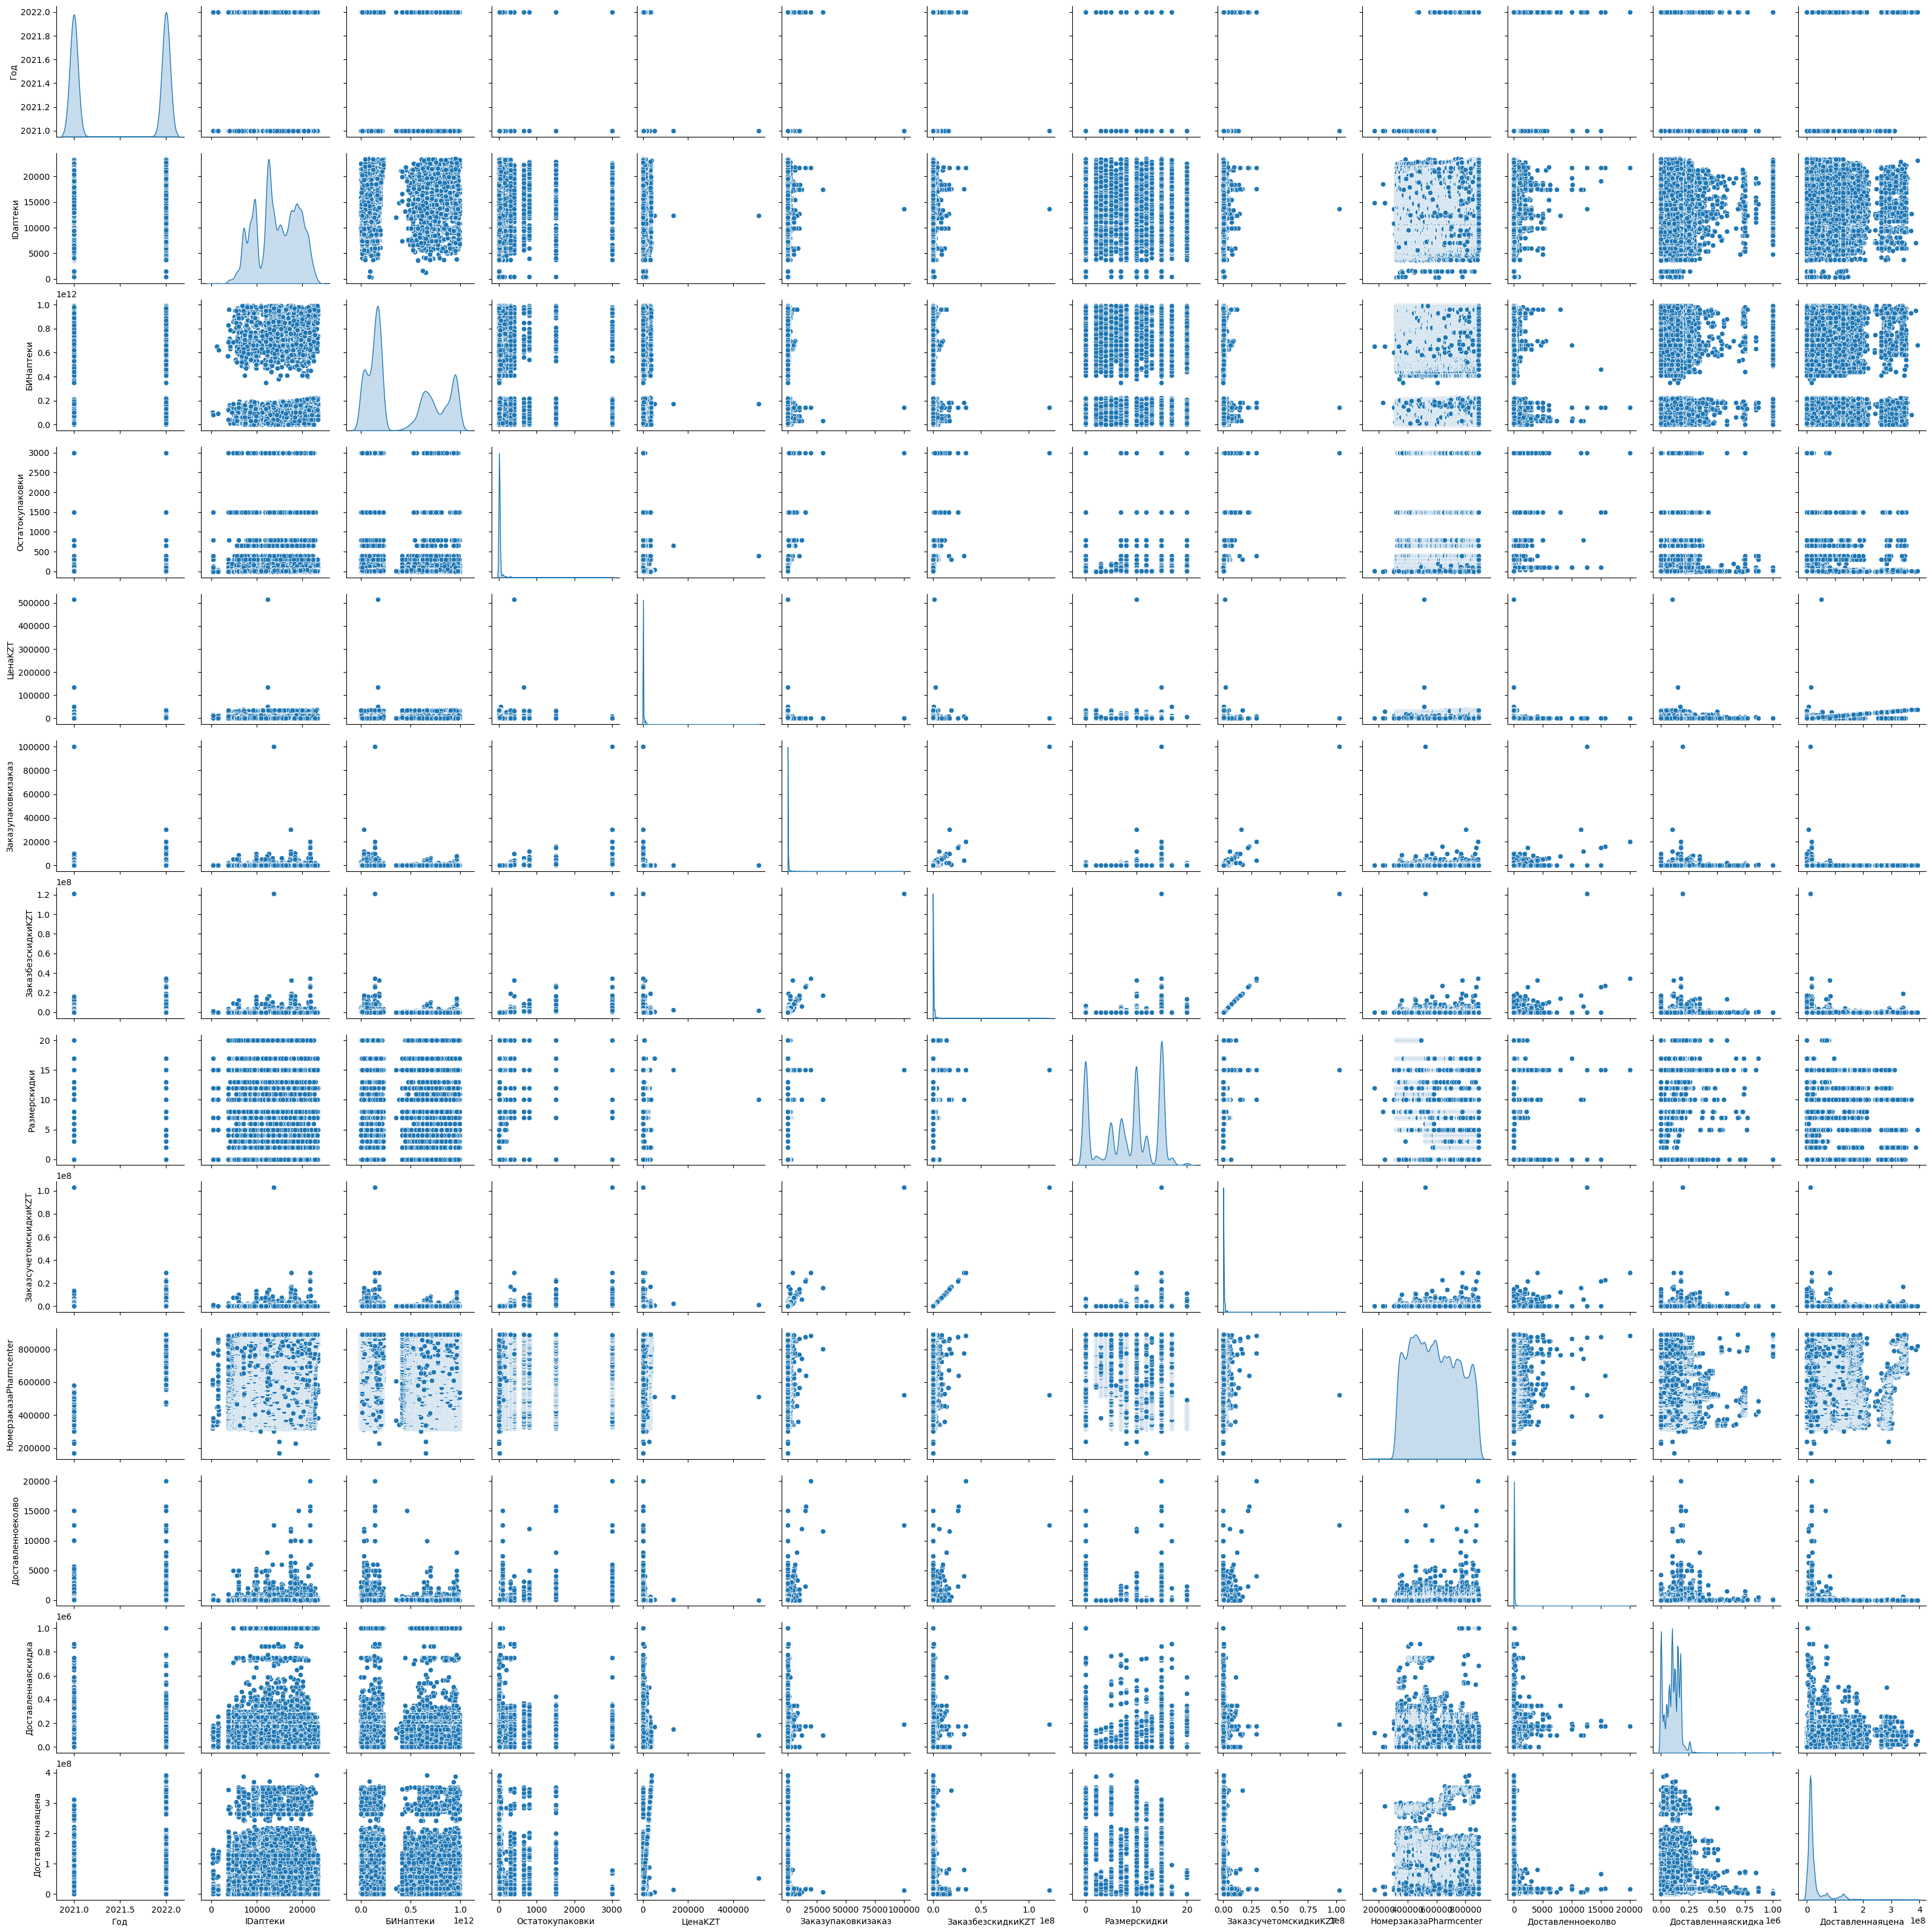

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for scatter matrix (requires seaborn)
sns.pairplot(completed_dataset, diag_kind='kde')

# Correlation matrix heatmap
corr_matrix = completed_dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Histogram of a specific column
plt.hist(completed_dataset['column_name'], bins=20)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of a Column')
plt.show()

In [ ]:
#ЗДЕСЬ НЕБОЛЬШОЙ ОБРАЗЕЦ ДЛЯ ПРОВЕРКИ

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with categorical columns
data = {'Category1': ['A', 'B', 'A', 'A', None],
        'Category2': ['X', 'Y', 'Z', 'X', 'Y'],
        'Category3': ['fgfX', None, 'fgZ', 'Xfg', 'fgY'],
        'Category4': [9, 8, 7, 7, 9]}
df = pd.DataFrame(data)

# Extract categorical column names
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Create dictionaries to store LabelEncoders and encoding mappings for each column
label_encoders = {}
encoding_mappings = {}

# Apply label encoding to each categorical column and store the encoders and mappings
for column in categorical_columns:
    if df[column].isna().any() and df[column].dtype == 'object': 
        non_nan_indices = df[column].notna()
        label_encoders[column] = LabelEncoder()
        df.loc[non_nan_indices, column + '_encoded'] = label_encoders[column].fit_transform(df.loc[non_nan_indices, column])
        encoding_mappings[column] = dict(zip(df[column], df[column + '_encoded']))

# Print the DataFrame with encoded columns
print("DataFrame with Encoded Columns:")
print(encoding_mappings['Category1'])
print(encoding_mappings['Category3'])
categorical_columns2 = ['Category1', 'Category3']

df.loc[1, 'Category3_encoded'] = 2.0
print(df)

# Reverse the label encoding using the encoding mappings to get back the original categorical columns
reverse_df = pd.DataFrame()

for column in categorical_columns2:
    reverse_df[column] = df[column + '_encoded'].map({v: k for k, v in encoding_mappings[column].items()})

# Print the reverse-transformed DataFrame
print("\nReverse-Transformed DataFrame (original categorical columns):")
print(reverse_df)


In [ ]:
#df = df.applymap(lambda x: np.nan if isinstance(x, list) and not x else x)

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')